## implementation of the KNN algorithm for classification.
# Given a dataset with unkown features classify the values to a target class using KNN.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('KNN_Project_Data')

In [4]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


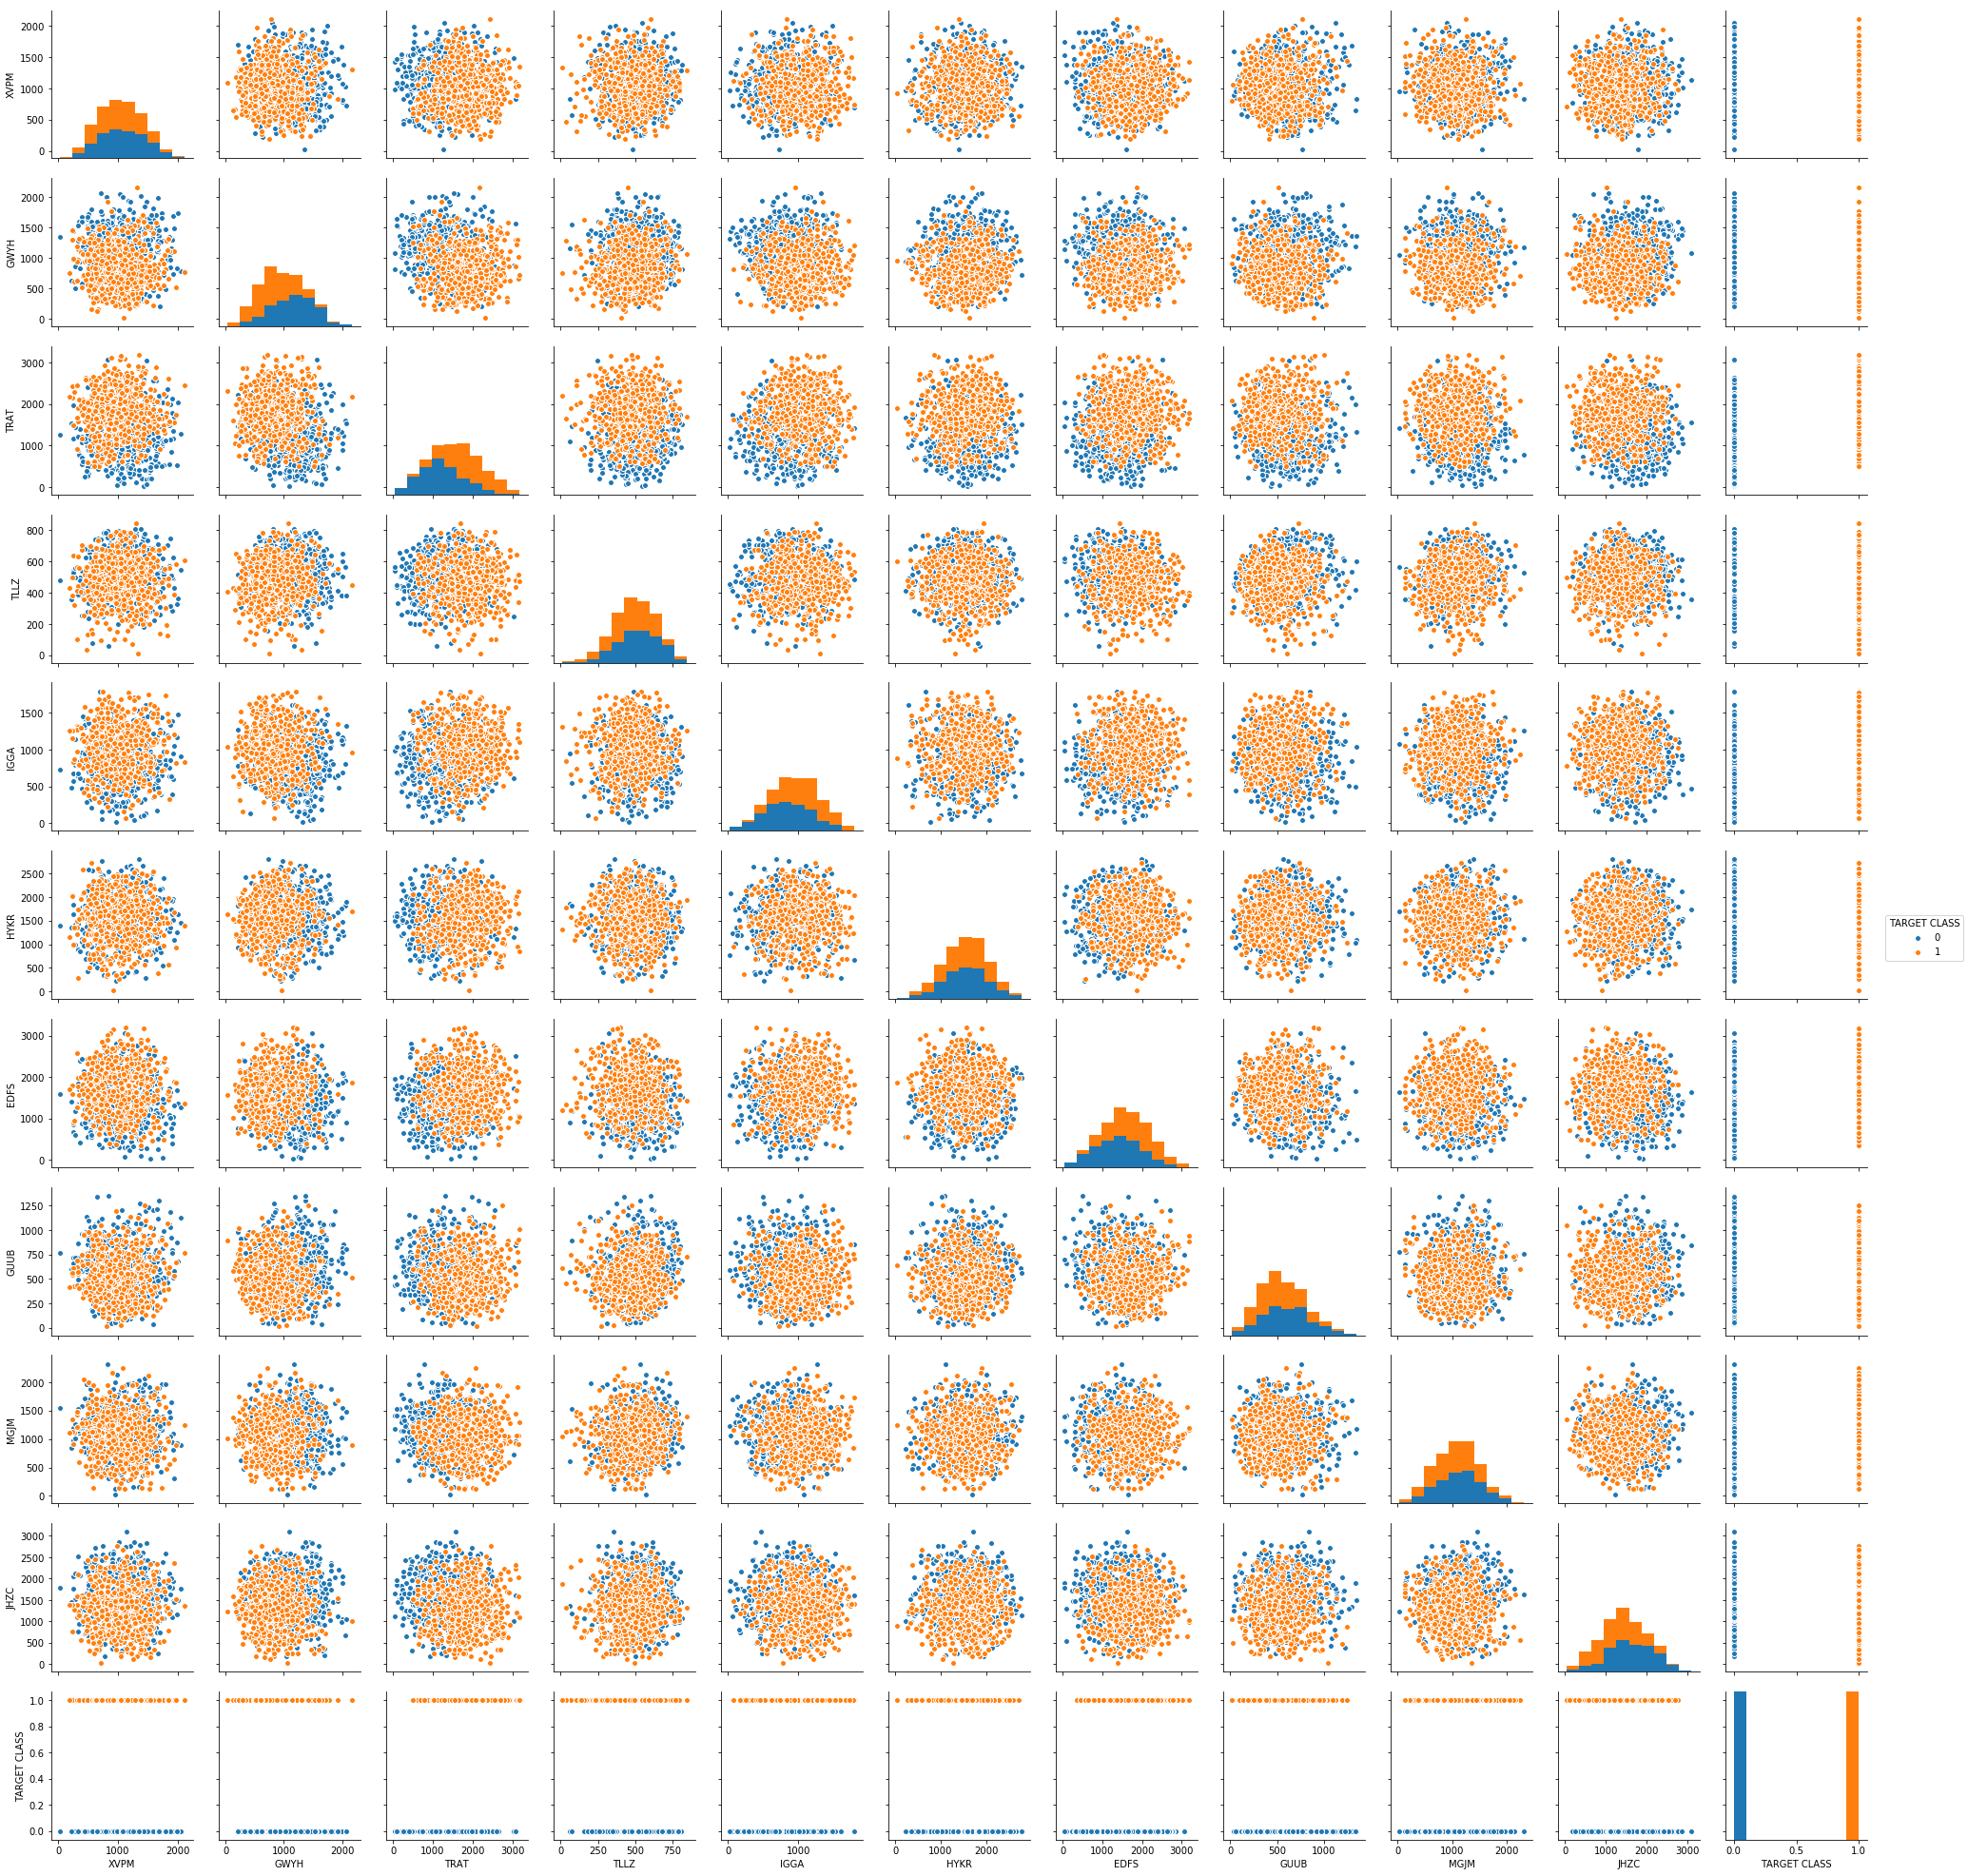

In [7]:
sns.pairplot(data=df,hue='TARGET CLASS')

## Standardising the scale and splitting to training and test set

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler=StandardScaler()

In [10]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_feat=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [13]:
df_feat=pd.DataFrame(scaled_feat,columns=df.columns[:-1])

In [15]:
from sklearn.cross_validation import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(scaled_feat,df["TARGET CLASS"],test_size=0.3)

## Applying KNN 

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn=KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [21]:
pred=knn.predict(X_test)

## Evaluate the model

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
print(confusion_matrix(y_test,pred))

[[101  41]
 [ 44 114]]


In [24]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.70      0.71      0.70       142
          1       0.74      0.72      0.73       158

avg / total       0.72      0.72      0.72       300



## Evaluate with different K

In [31]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

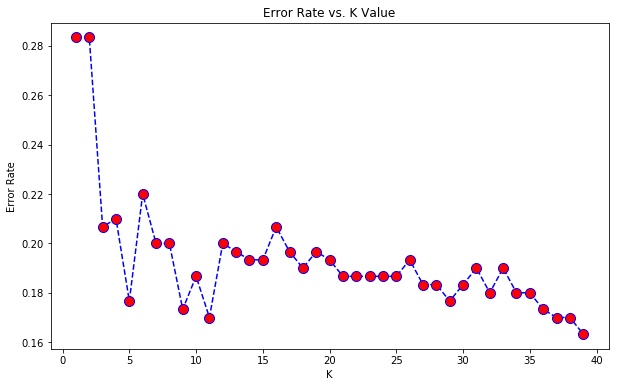

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)



In [34]:
print(confusion_matrix(y_test,pred))


[[115  27]
 [ 24 134]]


In [35]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.83      0.81      0.82       142
          1       0.83      0.85      0.84       158

avg / total       0.83      0.83      0.83       300



In [45]:
knn=KNeighborsClassifier(n_neighbors=36)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)


In [46]:
print(confusion_matrix(y_test,pred))

[[116  26]
 [ 26 132]]


In [47]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.82      0.82      0.82       142
          1       0.84      0.84      0.84       158

avg / total       0.83      0.83      0.83       300



## It can be seen that with a k value of 11 instead of 1 the model accuracy increases to 83% from 72 %